## PROYECTO DE ANÁLISIS DE DATOS DE FÚTBOL
### ASIGNATURA: MACHINE LEARNING
#### Autores: Manuel García Romero y Rafael Delgado Martínez

In [23]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.patches import Arc
import seaborn as sns

from statsbombpy import sb

from mplsoccer import Pitch, VerticalPitch, FontManager

from scipy.ndimage import gaussian_filter

from matplotlib import rcParams
import cmasher as cmr

from seaborn import kdeplot, distplot
%matplotlib inline

In [5]:
#Competiciones de statsbomb, nos quedaremos con la FA Women's Super League
comps = sb.competitions()
comps.head()

credentials were not supplied. open data access only


,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,16,4,Europe,Champions League,male,False,False,2018/2019,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2021-07-09T14:06:05.802
1,16,1,Europe,Champions League,male,False,False,2017/2018,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2021-01-23T21:55:30.425330
2,16,2,Europe,Champions League,male,False,False,2016/2017,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
3,16,27,Europe,Champions League,male,False,False,2015/2016,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
4,16,26,Europe,Champions League,male,False,False,2014/2015,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00


In [6]:
#Todos los partidos de esta competición, un total de 131 (2020/21)
M = sb.matches(37,90)
M.info()

credentials were not supplied. open data access only
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   match_id               131 non-null    int64 
 1   match_date             131 non-null    object
 2   kick_off               131 non-null    object
 3   competition            131 non-null    object
 4   season                 131 non-null    object
 5   home_team              131 non-null    object
 6   away_team              131 non-null    object
 7   home_score             131 non-null    int64 
 8   away_score             131 non-null    int64 
 9   match_status           131 non-null    object
 10  match_status_360       131 non-null    object
 11  last_updated           131 non-null    object
 12  last_updated_360       131 non-null    object
 13  match_week             131 non-null    int64 
 14  competition_stage    

In [7]:
#Eventos de un partido en concreto
eventos = sb.events(7576)
eventos.info()
'''match_events.columns
match_events = match_events[['team','type','minute','location','pass_end_location','player']]
match_events = match_events[match_events['type']=='Pass']
match_events.head(30)'''

credentials were not supplied. open data access only
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4154 entries, 0 to 4153
Data columns (total 79 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ball_receipt_outcome            114 non-null    object 
 1   ball_recovery_recovery_failure  2 non-null      object 
 2   carry_end_location              963 non-null    object 
 3   clearance_aerial_won            3 non-null      object 
 4   counterpress                    85 non-null     object 
 5   dribble_outcome                 36 non-null     object 
 6   dribble_overrun                 2 non-null      object 
 7   duel_outcome                    23 non-null     object 
 8   duel_type                       36 non-null     object 
 9   duration                        2641 non-null   float64
 10  foul_committed_advantage        2 non-null      object 
 11  foul_committed_card             2 non-null

"match_events.columns\nmatch_events = match_events[['team','type','minute','location','pass_end_location','player']]\nmatch_events = match_events[match_events['type']=='Pass']\nmatch_events.head(30)"

In [8]:
all_events = []
for i in range(0,len(M)):
    print(M.iloc[i]['match_id'])
    all_events.append(sb.events(M.iloc[i]['match_id']))
    
eventosLiga = pd.concat(all_events, ignore_index=True)

3775648
credentials were not supplied. open data access only
3775609
credentials were not supplied. open data access only
3775633
credentials were not supplied. open data access only
3775570
credentials were not supplied. open data access only
3775581
credentials were not supplied. open data access only
3775579
credentials were not supplied. open data access only
3775544
credentials were not supplied. open data access only
3775622
credentials were not supplied. open data access only
3775553
credentials were not supplied. open data access only
3775584
credentials were not supplied. open data access only
3775618
credentials were not supplied. open data access only
3775641
credentials were not supplied. open data access only
3775636
credentials were not supplied. open data access only
3775653
credentials were not supplied. open data access only
3775654
credentials were not supplied. open data access only
3775643
credentials were not supplied. open data access only
3764237
credentials were

In [9]:
eventosLiga.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443305 entries, 0 to 443304
Columns: 112 entries, 50_50 to goalkeeper_lost_in_play
dtypes: float64(5), int64(7), object(100)
memory usage: 378.8+ MB


In [46]:
eventosLiga.head()

,50_50,ball_receipt_outcome,ball_recovery_recovery_failure,block_deflection,block_offensive,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,...,goalkeeper_success_in_play,bad_behaviour_card,dribble_no_touch,shot_follows_dribble,goalkeeper_saved_to_post,half_start_late_video_start,goalkeeper_shot_saved_to_post,shot_saved_to_post,goalkeeper_lost_out,goalkeeper_lost_in_play
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


AxesSubplot(0.125,0.125;0.775x0.755)


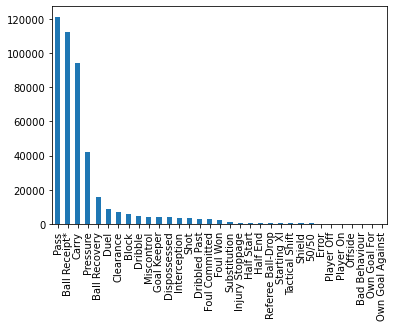

In [10]:
#Mostramos algo de información útil:
count=eventosLiga['type']
histogram = count.value_counts().plot.bar()
print(histogram)
plt.show()

AxesSubplot(0.260833,0.125;0.503333x0.755)


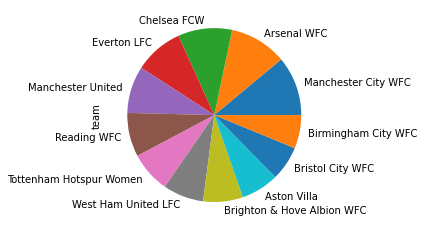

In [11]:
#Mostramos algo de información útil:
count=eventosLiga['team']
histogram = count.value_counts().plot.pie()
print(histogram)
plt.show()

AxesSubplot(0.260833,0.125;0.503333x0.755)


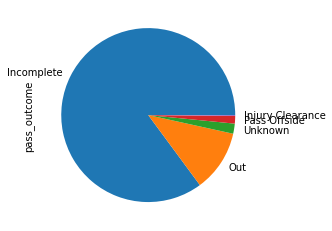

In [12]:
#Pases no completados
count=eventosLiga.loc[eventosLiga['type'] == 'Pass']
count=count['pass_outcome']
histogram = count.value_counts().plot.pie()
print(histogram)
plt.show()

AxesSubplot(0.260833,0.125;0.503333x0.755)


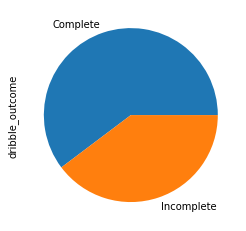

In [14]:
#Mostramos algo de información útil:
count=eventosLiga['dribble_outcome']
histogram = count.value_counts().plot.pie()
print(histogram)
plt.show()

AxesSubplot(0.125,0.125;0.775x0.755)


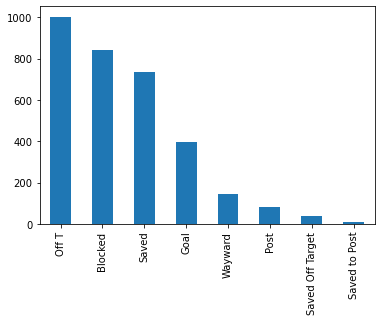

In [20]:
#Mostramos algo de información útil:
count=eventosLiga['shot_outcome']
histogram = count.value_counts().plot.bar()
print(histogram)
plt.show()

AxesSubplot(0.260833,0.125;0.503333x0.755)


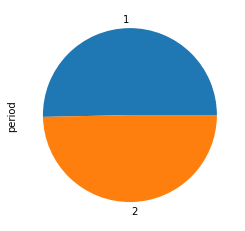

In [21]:
#Mostramos algo de información útil:
count=eventosLiga['period']
histogram = count.value_counts().plot.pie()
print(histogram)
plt.show()

<AxesSubplot:xlabel='minute', ylabel='Density'>

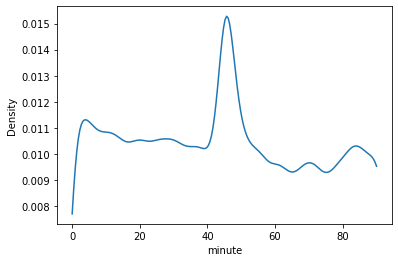

In [26]:
kdeplot(eventosLiga['minute'],clip=(0.0, 90.0))

AxesSubplot(0.260833,0.125;0.503333x0.755)


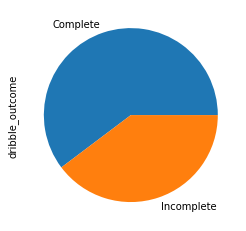

In [27]:
count=eventosLiga['dribble_outcome']
histogram = count.value_counts().plot.pie()
print(histogram)
plt.show()

In [28]:
eventosLiga.describe()

,duration,index,match_id,minute,pass_angle,pass_length,period,player_id,possession,possession_team_id,second,shot_statsbomb_xg
count,330922.000000,443305.000000,4.433050e+05,443305.000000,121382.000000,121382.000000,443305.000000,441379.000000,443305.000000,443305.000000,443305.000000,3248.000000
mean,1.254296,1705.113455,3.774558e+06,45.511018,0.005815,21.404722,1.496642,19135.780289,98.776226,1082.265512,29.288684,0.117481
std,1.402620,998.531251,3.278090e+03,27.252507,1.526803,13.897759,0.499989,12779.792748,57.972232,453.394005,17.417091,0.150225
min,0.000000,1.000000,3.764230e+06,0.000000,-3.136667,0.000000,1.000000,4633.000000,1.000000,746.000000,0.000000,0.000000
25%,0.195661,847.000000,3.775560e+06,22.000000,-1.112720,11.677756,1.000000,10192.000000,49.000000,965.000000,14.000000,0.027917
50%,1.047893,1693.000000,3.775593e+06,45.000000,-0.009824,17.827227,1.000000,15648.000000,97.000000,969.000000,29.000000,0.056342
75%,1.755570,2539.000000,3.775626e+06,69.000000,1.130954,27.418971,2.000000,25453.000000,147.000000,973.000000,44.000000,0.138513
max,158.659160,4152.000000,3.775659e+06,102.000000,3.141593,115.342445,2.000000,105102.000000,244.000000,2647.000000,59.000000,0.912725


In [58]:
#formateamos posición
eventosLiga[['x', 'y']] = eventosLiga['location'].apply(pd.Series)
eventosLiga.columns

Index(['50_50', 'ball_receipt_outcome', 'ball_recovery_recovery_failure',
       'block_deflection', 'block_offensive', 'carry_end_location',
       'clearance_aerial_won', 'clearance_body_part', 'clearance_head',
       'clearance_left_foot',
       ...
       'dribble_no_touch', 'shot_follows_dribble', 'goalkeeper_saved_to_post',
       'half_start_late_video_start', 'goalkeeper_shot_saved_to_post',
       'shot_saved_to_post', 'goalkeeper_lost_out', 'goalkeeper_lost_in_play',
       'x', 'y'],
      dtype='object', length=114)

In [64]:
equipos = ['Arsenal WFC']
  
# selecting rows
df_filtrado = eventosLiga.loc[eventosLiga['team'].isin(equipos)]

pasesArsenal=df_filtrado.loc[df_filtrado['type'] == 'Pass']
presionArsenal=df_filtrado.loc[df_filtrado['type'] == 'Pressure']

In [102]:
Arsenal=M.loc[M['home_team'] == 'Arsenal WFC']
Arsenal

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,match_status_360,last_updated,last_updated_360,match_week,competition_stage,stadium,referee,data_version,shot_fidelity_version,xy_fidelity_version
1,3775609,2021-04-28,20:30:00.000,England - FA Women's Super League,2020/2021,Arsenal WFC,West Ham United LFC,2,0,available,scheduled,2021-05-28T15:32:57.267,2021-06-13T16:17:31.694,13,Regular Season,Meadow Park,Emily Heaslip,1.1.0,2,2
9,3775584,2020-12-06,15:00:00.000,England - FA Women's Super League,2020/2021,Arsenal WFC,Birmingham City WFC,3,0,available,scheduled,2021-04-28T07:08:31.973962,2021-06-13T16:17:31.694,8,Regular Season,Meadow Park,Christina Hattersley,1.1.0,2,2
18,3775560,2021-05-09,15:30:00.000,England - FA Women's Super League,2020/2021,Arsenal WFC,Aston Villa,0,0,available,scheduled,2021-05-12T09:12:43.050169,2021-06-13T16:17:31.694,22,Regular Season,Meadow Park,Abigail Byrne,1.1.0,2,2
21,3764233,2020-09-06,13:30:00.000,England - FA Women's Super League,2020/2021,Arsenal WFC,Reading WFC,6,1,available,scheduled,2020-09-10T19:07:18.289932,2021-06-13T16:17:31.694,1,Regular Season,Meadow Park,Amy Fearn,1.1.0,2,2
27,3775559,2020-12-20,13:30:00.000,England - FA Women's Super League,2020/2021,Arsenal WFC,Everton LFC,4,0,available,scheduled,2021-06-12T22:33:04.997,2021-06-13T16:17:31.694,10,Regular Season,Meadow Park,Helen Conley,1.1.0,2,2
51,3775557,2021-04-25,15:00:00.000,England - FA Women's Super League,2020/2021,Arsenal WFC,Brighton & Hove Albion WFC,2,0,available,scheduled,2021-04-26T07:59:59.353501,2021-06-13T16:17:31.694,20,Regular Season,Meadow Park,Lisa Benn,1.1.0,2,2
63,3775586,2020-10-18,15:30:00.000,England - FA Women's Super League,2020/2021,Arsenal WFC,Tottenham Hotspur Women,6,1,available,scheduled,2020-10-27T15:24:31.224914,2021-06-13T16:17:31.694,5,Regular Season,Meadow Park,Abigail Byrne,1.1.0,2,2
75,3775597,2021-03-19,19:30:00.000,England - FA Women's Super League,2020/2021,Arsenal WFC,Manchester United,2,0,available,scheduled,2021-06-21T22:10:21.903,2021-06-13T16:17:31.694,17,Regular Season,Meadow Park,Amy Fearn,1.1.0,2,2
79,3775627,2020-11-15,15:30:00.000,England - FA Women's Super League,2020/2021,Arsenal WFC,Chelsea FCW,1,1,available,scheduled,2020-11-16T22:41:10.963969,2021-06-13T16:17:31.694,7,Regular Season,Meadow Park,Kirsty Dowle,1.1.0,2,2
90,3775600,2021-02-07,15:30:00.000,England - FA Women's Super League,2020/2021,Arsenal WFC,Manchester City WFC,1,2,available,scheduled,2021-02-09T20:53:49.805431,2021-06-13T16:17:31.694,14,Regular Season,Meadow Park,Kirsty Dowle,1.1.0,2,2


In [71]:
pasesArsenal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13909 entries, 6 to 441050
Columns: 114 entries, 50_50 to y
dtypes: float64(7), int64(7), object(100)
memory usage: 12.2+ MB


In [72]:
df_tirosManchester = eventosLiga.loc[eventosLiga['team'] == 'Manchester City WFC']
tirosManchester=df_tirosManchester.loc[df_tirosManchester['type'] == 'Shot']

[None, None, None, None, None, None, None, None, None, None]

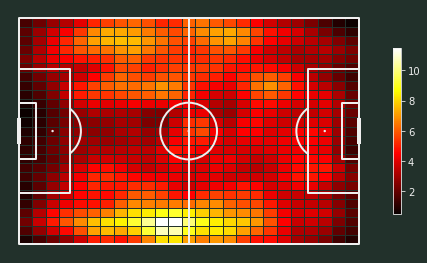

In [69]:
# setup pitch
pitch = Pitch(pitch_type='statsbomb', line_zorder=2,
              pitch_color='#22312b', line_color='#efefef')
# draw
fig, ax = pitch.draw(figsize=(6.6, 4.125))
fig.set_facecolor('#22312b')
bin_statistic = pitch.bin_statistic(presionArsenal.x, presionArsenal.y, statistic='count', bins=(25, 25))
bin_statistic['statistic'] = gaussian_filter(bin_statistic['statistic'], 1)
pcm = pitch.heatmap(bin_statistic, ax=ax, cmap='hot', edgecolors='#22312b')
# Add the colorbar and format off-white
cbar = fig.colorbar(pcm, ax=ax, shrink=0.6)
cbar.outline.set_edgecolor('#efefef')
cbar.ax.yaxis.set_tick_params(color='#efefef')
plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), color='#efefef')

[None, None, None, None, None, None, None, None, None, None, None, None]

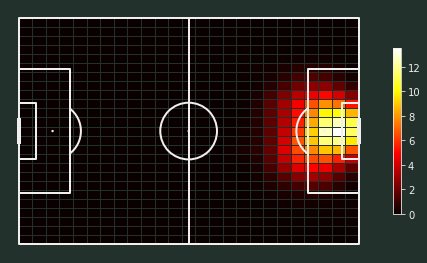

In [73]:
# setup pitch
pitch = Pitch(pitch_type='statsbomb', line_zorder=2,
              pitch_color='#22312b', line_color='#efefef')
# draw
fig, ax = pitch.draw(figsize=(6.6, 4.125))
fig.set_facecolor('#22312b')
bin_statistic = pitch.bin_statistic(tirosManchester.x, tirosManchester.y, statistic='count', bins=(25, 25))
bin_statistic['statistic'] = gaussian_filter(bin_statistic['statistic'], 1)
pcm = pitch.heatmap(bin_statistic, ax=ax, cmap='hot', edgecolors='#22312b')
# Add the colorbar and format off-white
cbar = fig.colorbar(pcm, ax=ax, shrink=0.6)
cbar.outline.set_edgecolor('#efefef')
cbar.ax.yaxis.set_tick_params(color='#efefef')
plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), color='#efefef')

[None, None, None, None, None, None, None, None]

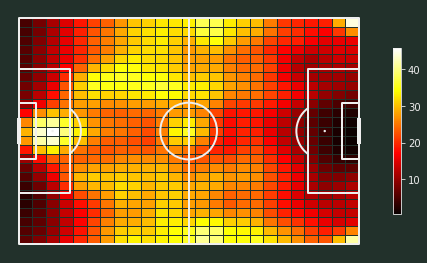

In [74]:
# setup pitch
pitch = Pitch(pitch_type='statsbomb', line_zorder=2,
              pitch_color='#22312b', line_color='#efefef')
# draw
fig, ax = pitch.draw(figsize=(6.6, 4.125))
fig.set_facecolor('#22312b')
bin_statistic = pitch.bin_statistic(pasesArsenal.x, pasesArsenal.y, statistic='count', bins=(25, 25))
bin_statistic['statistic'] = gaussian_filter(bin_statistic['statistic'], 1)
pcm = pitch.heatmap(bin_statistic, ax=ax, cmap='hot', edgecolors='#22312b')
# Add the colorbar and format off-white
cbar = fig.colorbar(pcm, ax=ax, shrink=0.6)
cbar.outline.set_edgecolor('#efefef')
cbar.ax.yaxis.set_tick_params(color='#efefef')
plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), color='#efefef')

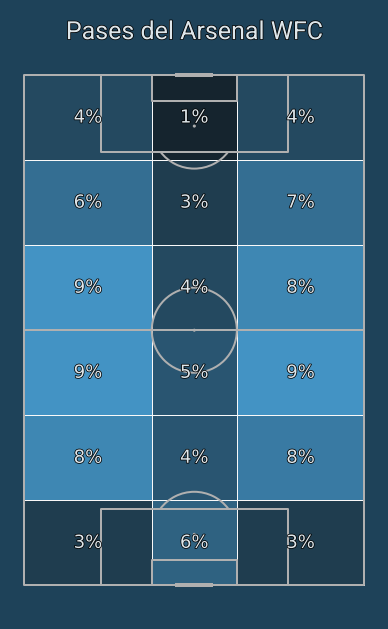

In [80]:
import matplotlib.patheffects as path_effects
from matplotlib.colors import LinearSegmentedColormap
# fontmanager for google font (robotto)
robotto_regular = FontManager()

# path effects
path_eff = [path_effects.Stroke(linewidth=1.5, foreground='black'),
            path_effects.Normal()]

# see the custom colormaps example for more ideas on setting colormaps
pearl_earring_cmap = LinearSegmentedColormap.from_list("Pearl Earring - 10 colors",
                                                       ['#15242e', '#4393c4'], N=10)

pitch = VerticalPitch(pitch_type='statsbomb', line_zorder=2, pitch_color='#1e4259')
fig, axs = pitch.grid(endnote_height=0.03, endnote_space=0,
                      title_height=0.08, title_space=0,
                      # Turn off the endnote/title axis. I usually do this after
                      # I am happy with the chart layout and text placement
                      axis=False,
                      grid_height=0.84)
fig.set_facecolor('#1e4259')

bin_x = np.linspace(pitch.dim.left, pitch.dim.right, num=7)
bin_y = np.sort(np.array([pitch.dim.bottom, pitch.dim.six_yard_bottom,
                          pitch.dim.six_yard_top, pitch.dim.top]))
bin_statistic = pitch.bin_statistic(pasesArsenal.x, pasesArsenal.y, statistic='count',
                                    bins=(bin_x, bin_y), normalize=True)
pitch.heatmap(bin_statistic, ax=axs['pitch'], cmap=pearl_earring_cmap, edgecolor='#f9f9f9')
labels3 = pitch.label_heatmap(bin_statistic, color='#dee6ea', fontsize=18,
                              ax=axs['pitch'], ha='center', va='center',
                              str_format='{:.0%}', path_effects=path_eff)

# endnote and title
#axs['endnote'].text(1, 0.5, '@your_twitter_handle', va='center', ha='right', fontsize=15,
#                    fontproperties=robotto_regular.prop, color='#dee6ea')
axs['title'].text(0.5, 0.5, "Distribución de pases del Arsenal WFC", color='#dee6ea',
                  va='center', ha='center', path_effects=path_eff,
                  fontproperties=robotto_regular.prop, fontsize=25)

plt.show()

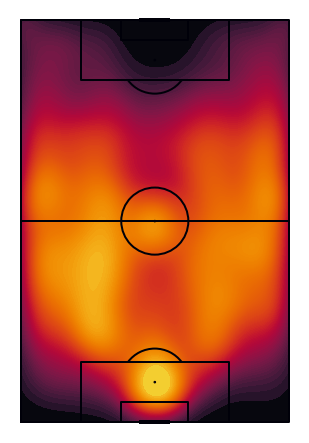

In [99]:
cmap = LinearSegmentedColormap.from_list("cmr.ember",
                                                  ['#e3aca7', '#c03a1d'], N=100)

pitch = VerticalPitch(line_color='#000009', line_zorder=2)
fig, ax = pitch.draw(figsize=(4.4, 6.4))
kde = pitch.kdeplot(pasesArsenal.x, pasesArsenal.y, ax=ax,
                    # shade using 100 levels so it looks smooth
                    shade=True, levels=100,
                    # shade the lowest area so it looks smooth
                    # so even if there are no events it gets some color
                    shade_lowest=True,
                    cut=4,  # extended the cut so it reaches the bottom edge
                    cmap=cmr.ember)

In [121]:
'''Ejemplo de contenido en un evento'''
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(eventosLiga.iloc[1375])

50_50                                                                  NaN
ball_receipt_outcome                                            Incomplete
ball_recovery_recovery_failure                                         NaN
block_deflection                                                       NaN
block_offensive                                                        NaN
carry_end_location                                                     NaN
clearance_aerial_won                                                   NaN
clearance_body_part                                                    NaN
clearance_head                                                         NaN
clearance_left_foot                                                    NaN
clearance_right_foot                                                   NaN
counterpress                                                           NaN
dribble_nutmeg                                                         NaN
dribble_outcome          

In [ ]:
#Jugadoras de la liga que mas pases con ocasion de tiro dan.
eventosLiga.describe()